In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [3]:
data = pd.read_csv("new_supply.csv")
data.head(5)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [4]:
features = ['Ship ahead day count', 'Unit quantity', 'Weight']
X = data[features]

In [5]:
# used for scaling the values it is used to standardize and normalize
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd

In [6]:
#n_neighbours-consider the nearest values for local density contamination is the proportion of data
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

#this fits the lof model to x_scaled predict method predicts the features with -1
y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1

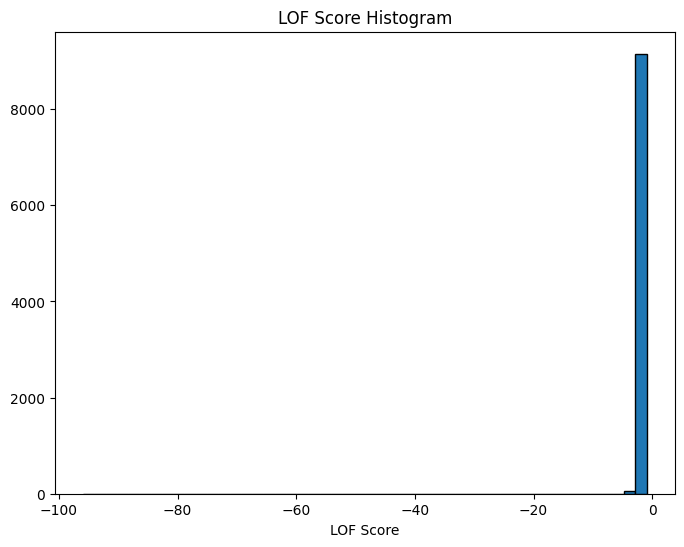

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(lof.negative_outlier_factor_, bins=50, edgecolor='k')
plt.title("LOF Score Histogram")
plt.xlabel("LOF Score")
plt.show()


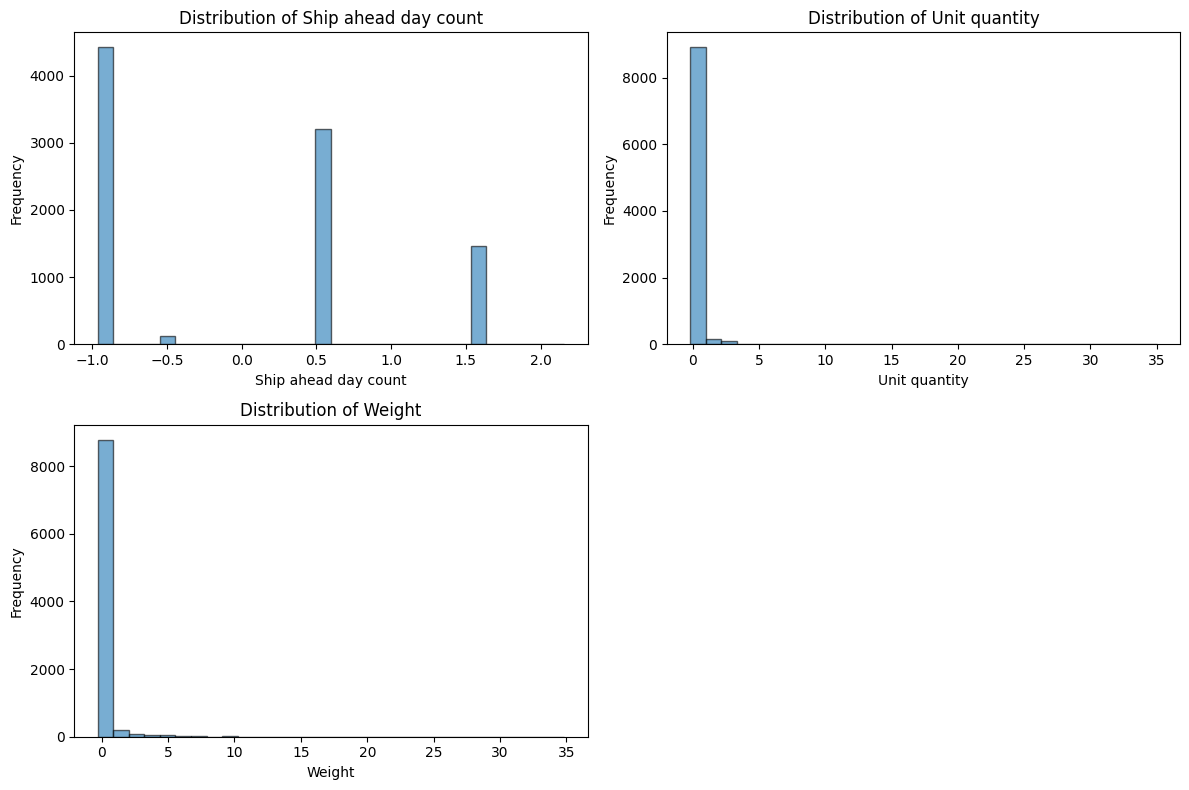

In [8]:
plt.figure(figsize=(12, 8))
for i in range(X_scaled.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.hist(X_scaled[:, i], bins=30, edgecolor='k', alpha=0.6)
    plt.title(f'Distribution of {features[i]}')
    plt.xlabel(features[i])
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


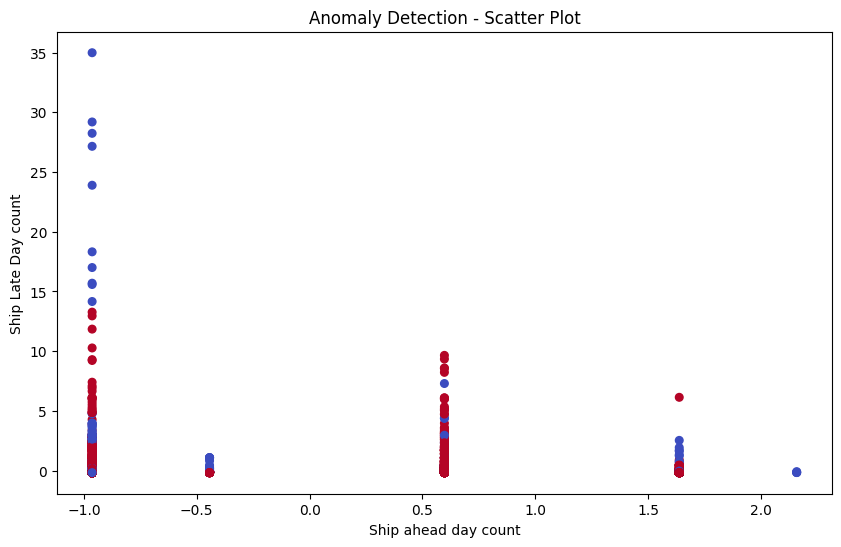

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='coolwarm', s=30)
plt.title("Anomaly Detection - Scatter Plot")
plt.xlabel("Ship ahead day count")
plt.ylabel("Ship Late Day count")
plt.show()
